<a href="https://colab.research.google.com/github/LeixD810/20229540-Oct-12-quiz/blob/main/20229540_Le_Nguyen_Thai_Duong_Oct_12_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Ecommerce Customers.csv')

In [ ]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
data.drop(columns=["Email",	"Address",	"Avatar"], inplace=True)

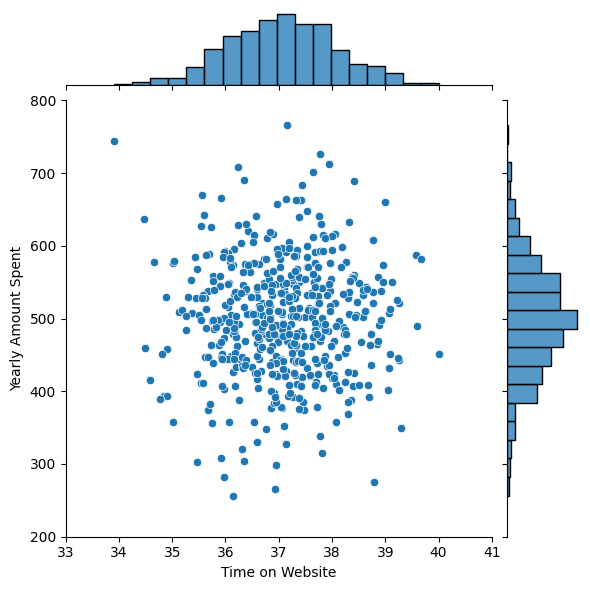

In [ ]:
sns.jointplot(data[["Time on Website", "Yearly Amount Spent"]],
              x="Time on Website",
              y="Yearly Amount Spent",
              xlim={33,41}, ylim={200,800},
              )

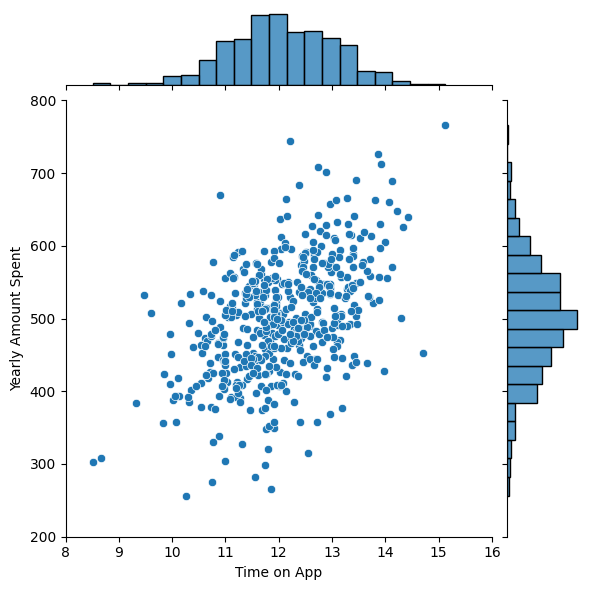

In [ ]:
sns.jointplot(data[["Time on App", "Yearly Amount Spent"]],
              x="Time on App",
              y="Yearly Amount Spent",
              xlim={8,16}, ylim={200,800},
              )

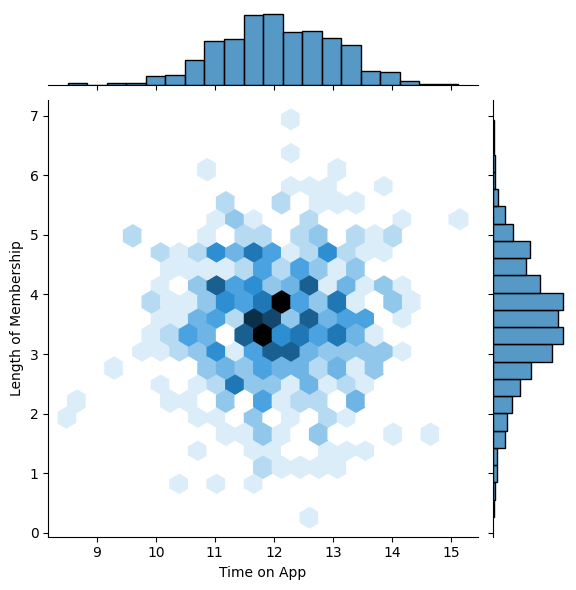

In [ ]:
sns.jointplot(data[["Time on App", "Length of Membership"]],
              x= "Time on App",
              y= "Length of Membership",
              kind= "hex"
              )

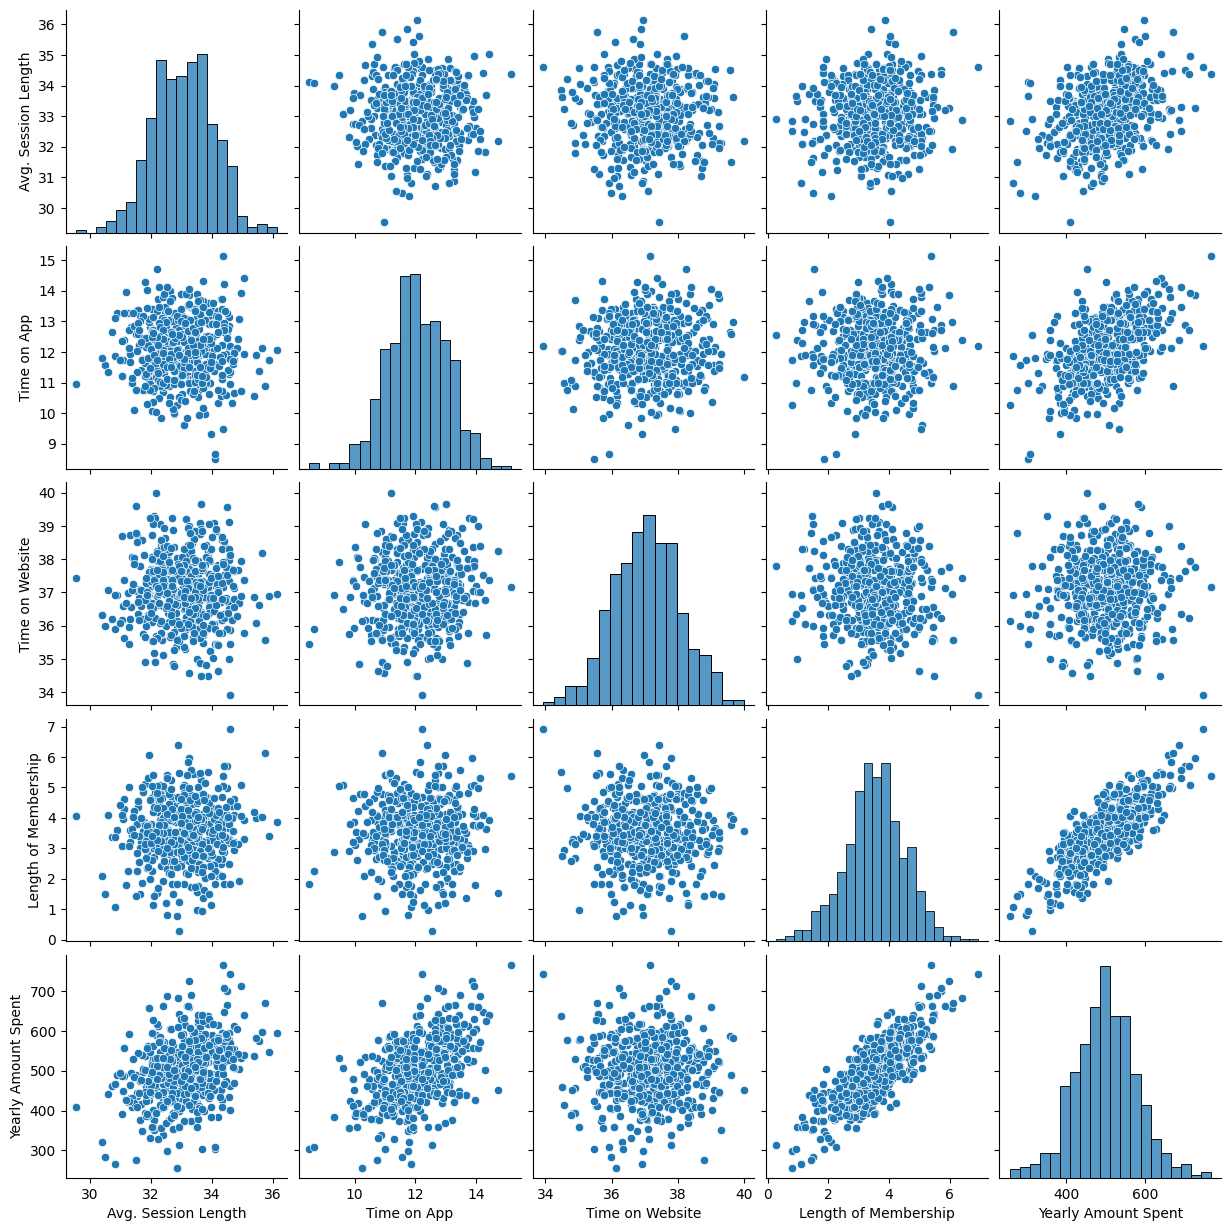

In [ ]:
sns.pairplot(data)

###Based off this plot, Length of Membership is the most correlated feature with Yearly Amount Spent

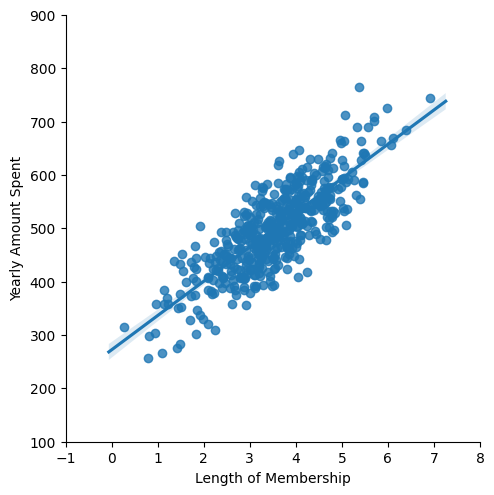

In [ ]:
sns.lmplot(data[["Length of Membership", "Yearly Amount Spent"]],
           x= "Length of Membership",
           y= "Yearly Amount Spent",
           truncate= False)
plt.xlim(-1, 8)
plt.ylim(100, 900)
plt.show()

In [ ]:
X = data[['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']]
y = data['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
lm.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [ ]:
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [ ]:
prediction = lm.predict(X_test)

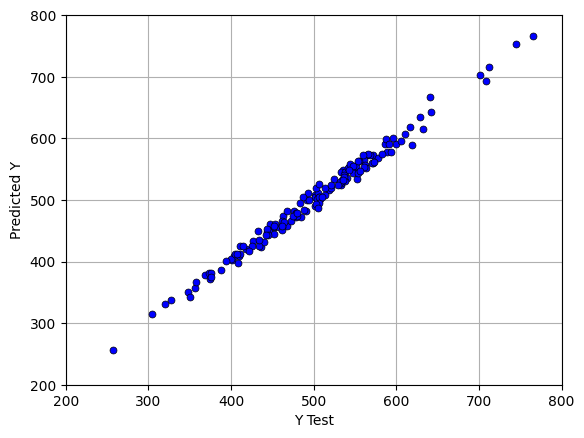

In [ ]:
plt.scatter(y_test,prediction,marker = ".", c = "#0000FF", s = 100, edgecolors= "black", lw=0.5, zorder=2)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.xlim(200, 800)
plt.ylim(200, 800)
plt.grid(zorder=1)
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


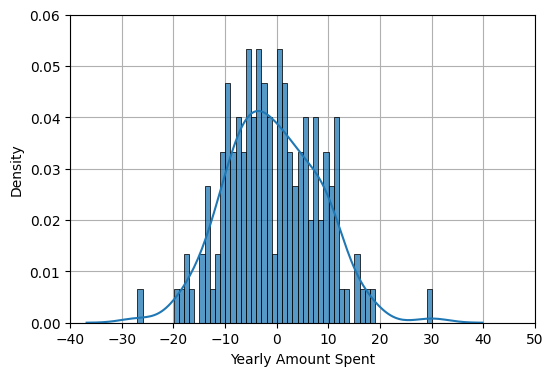

In [ ]:
res = y_test-prediction

#Freedman-Diaconis rule for bin number calculation
#q1 = res.quantile(0.25)
#q3 = res.quantile(0.75)
#iqr = q3 - q1
#bin_width = (2 * iqr) / (len(res) ** (1 / 3))
#bin_count = int(np.ceil((res.max() - res.min()) / bin_width))

plt.figure(figsize=(6, 4))
sns.histplot(res, stat = 'density', binwidth =1, zorder=2)
plt.xlim(-40, 50)
plt.ylim(0, 0.06)
plt.ylabel(None)
sns.kdeplot(res, clip=None)
plt.grid(zorder=1)
plt.show()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of \$25.981550 Yearly Amount Spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of \$38.590159 Yearly Amount Spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of \$0.190405 Yearly Amount Spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership	 is associated with an increase of \$61.279097 Yearly Amount Spent.


**Do you think the company should focus more on their mobile app or on their website?**

I think the company should focus more on their mobile app